In [1]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)


2.2.0


Using TensorFlow backend.


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-13 22:21:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  62.7MB/s    in 1.0s    

2020-06-13 22:21:17 (62.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_dir='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/cats_and_dogs_filtered.zip' mode='r'>>

In [0]:
train_dir=os.path.join('/tmp/cats_and_dogs_filtered/train')
validation_dir=os.path.join('/tmp/cats_and_dogs_filtered/validation')

In [5]:

model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(150,150,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               
                              
                           
                              
                               
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),
                               keras.layers.Dense(units=256,activation=tf.nn.relu),
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               
                               
                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 73, 64)        12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [0]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)

In [7]:
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150)) 
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=1)

Epoch 1/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6945 - accuracy: 0.5045 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6932 - accuracy: 0.5260 - val_loss: 0.6879 - val_accuracy: 0.5320
Epoch 3/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6897 - accuracy: 0.5265 - val_loss: 0.6883 - val_accuracy: 0.5350
Epoch 4/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6905 - accuracy: 0.5115 - val_loss: 0.6884 - val_accuracy: 0.5080
Epoch 5/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6954 - accuracy: 0.5245 - val_loss: 0.7569 - val_accuracy: 0.5010
Epoch 6/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6957 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6928 - accuracy: 0.5295 - val_loss: 0.6873 -

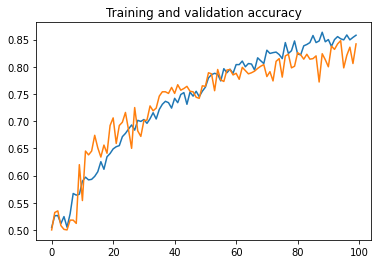

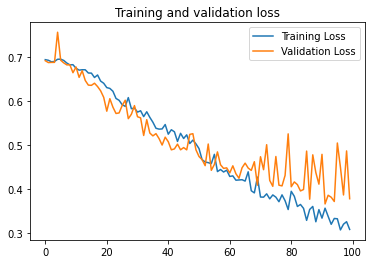

In [9]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()